# Volcano plot

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_table("/Users/sunnysun/Desktop/SYN1_J12_58_vs_YJL269_genes.txt")

/var/folders/m8/s9fnpvhj7qsgng70w8xpts_m0000gn/T/ipykernel_82391/3306920387.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  up["Unnamed: 0"] = ["FLO9", "RRT15", "YIR042C"]


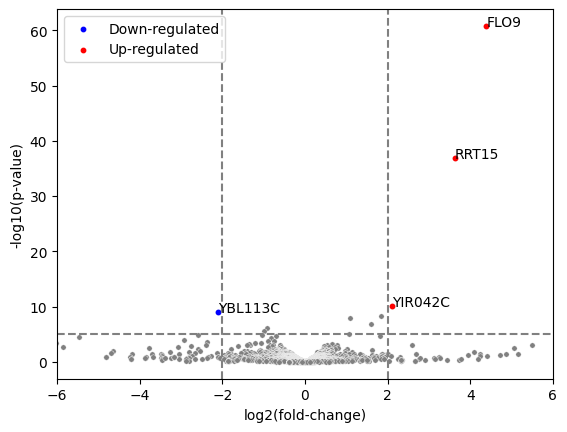

In [3]:
sns.scatterplot(x=df['log2FoldChange'], y=-np.log10(df['pvalue']), s=15, color='grey')
plt.xlabel("log2(fold-change)")
plt.ylabel("-log10(p-value)")
plt.axvline(-2,color="grey",linestyle="--")
plt.axvline(2,color="grey",linestyle="--")
plt.axhline(5,color="grey",linestyle="--")
plt.xlim(-6, 6)

down = df[(df['log2FoldChange']<-2)&(df['pvalue']<0.00001)]
up = df[(df['log2FoldChange']>2)&(df['pvalue']<0.00001)]
up["Unnamed: 0"] = ["FLO9", "RRT15", "YIR042C"]
plt.scatter(x=down['log2FoldChange'],y=down['pvalue'].apply(lambda x:-np.log10(x)),s=10,label="Down-regulated",color="blue")
plt.scatter(x=up['log2FoldChange'],y=up['pvalue'].apply(lambda x:-np.log10(x)),s=10,label="Up-regulated",color="red")
for i,r in up.iterrows():
    plt.text(x=r['log2FoldChange'],y=-np.log10(r['pvalue']),s=r['Unnamed: 0'])
for i,r in down.iterrows():
    plt.text(x=r['log2FoldChange'],y=-np.log10(r['pvalue']),s=r['Unnamed: 0'])
plt.legend(loc = "upper left")